# Convolutional Neural Network

# Part 1 - Building the CNN

In [13]:
#folder structure
#dataset
    #test_set
        #cats
        #dogs
    #train_set
        #cats
        #dogs

In [3]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [19]:
# Image dimensions
img_width,img_height=64,64

In [51]:
def create_model(p,input_shape=(32,32,3)):
    # Initialising the CNN
    classifier = Sequential()
    #Convolution + Pooling Layer
    classifier.add(Convolution2D(filters=32,kernel_size=(3,3), padding="same" , input_shape=input_shape, activation='relu' ))
    classifier.add(MaxPooling2D(pool_size=(2,2)))
    #Convolution + Pooling Layer
    classifier.add(Convolution2D(filters=32,kernel_size=(3,3), padding="same" ,  activation='relu' ))
    classifier.add(MaxPooling2D(pool_size=(2,2)))
    #Convolution + Pooling Layer
    classifier.add(Convolution2D(filters=64,kernel_size=(3,3), padding="same" , activation='relu' ))
    classifier.add(MaxPooling2D(pool_size=(2,2)))
    #Convolution + Pooling Layer
    classifier.add(Convolution2D(filters=64,kernel_size=(3,3), padding="same" , activation='relu' ))
    classifier.add(MaxPooling2D(pool_size=(2,2)))
    
    #Flattening 
    classifier.add(Flatten())
    
    #Fully Connection
    classifier.add(Dense(units=64, activation='relu' ))
    classifier.add(Dropout(p))
    classifier.add(Dense(units=64, activation='relu' ))
    classifier.add(Dropout(p/2))
    classifier.add(Dense(units=64, activation='relu' ))
    #output layer
    classifier.add(Dense(units=1, activation='sigmoid' ))
    
    # Compiling the CNN
    optimizer = Adam(lr=1e-3)
    metrics=['accuracy']
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy' , metrics=metrics)
    return classifier

In [72]:
def run_training(batch_size=32,epochs=10):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

    test_datagen = ImageDataGenerator(rescale=1./255)

    training_set = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(img_width, img_height),  #dimension expected by CNN
        batch_size=batch_size,
        class_mode='binary')  #binary or more than 2

    test_set = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')
    
    classifier=create_model(p=0.6,input_shape=(img_width,image_height,3))
    classifier.fit_generator(
        training_set,
        steps_per_epoch=8000/batch_size, 
        epochs=epochs,
        validation_data=test_set,
        validation_steps=2000/batch_size,
        workers=12,
        max_q_size=100
    )
    return classifier

In [73]:
model=run_training(batch_size=32,epochs=100)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


/home/cloudera/virtualenv/python27/lib/python2.7/site-packages/ipykernel_launcher.py:30: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., workers=12, validation_data=<keras.pre..., steps_per_epoch=250, epochs=100, max_queue_size=100, validation_steps=62)`


Epoch 1/100
250/250 [==============================] - 39s - loss: 0.6941 - acc: 0.4859 - val_loss: 0.6931 - val_acc: 0.5010
Epoch 2/100
250/250 [==============================] - 36s - loss: 0.6934 - acc: 0.4964 - val_loss: 0.6931 - val_acc: 0.5071
Epoch 3/100
250/250 [==============================] - 37s - loss: 0.6924 - acc: 0.5115 - val_loss: 0.6856 - val_acc: 0.5432
Epoch 4/100
250/250 [==============================] - 36s - loss: 0.6935 - acc: 0.5042 - val_loss: 0.6930 - val_acc: 0.5020
Epoch 5/100
250/250 [==============================] - 36s - loss: 0.6931 - acc: 0.5217 - val_loss: 0.6889 - val_acc: 0.5737
Epoch 6/100
250/250 [==============================] - 36s - loss: 0.6844 - acc: 0.5581 - val_loss: 0.6824 - val_acc: 0.5462
Epoch 7/100
250/250 [==============================] - 36s - loss: 0.6635 - acc: 0.5964 - val_loss: 0.6374 - val_acc: 0.6408
Epoch 8/100
250/250 [==============================] - 37s - loss: 0.6440 - acc: 0.6370 - val_loss: 0.6254 - val_acc: 0.6611


250/250 [==============================] - 35s - loss: 0.2867 - acc: 0.8766 - val_loss: 0.3194 - val_acc: 0.8669
Epoch 67/100
250/250 [==============================] - 36s - loss: 0.2829 - acc: 0.8800 - val_loss: 0.3380 - val_acc: 0.8476
Epoch 68/100
250/250 [==============================] - 35s - loss: 0.2817 - acc: 0.8812 - val_loss: 0.3325 - val_acc: 0.8603
Epoch 69/100
250/250 [==============================] - 35s - loss: 0.2719 - acc: 0.8826 - val_loss: 0.3324 - val_acc: 0.8633
Epoch 70/100
250/250 [==============================] - 35s - loss: 0.2707 - acc: 0.8869 - val_loss: 0.3330 - val_acc: 0.8598
Epoch 71/100
250/250 [==============================] - 35s - loss: 0.2686 - acc: 0.8862 - val_loss: 0.3233 - val_acc: 0.8577
Epoch 72/100
250/250 [==============================] - 35s - loss: 0.2725 - acc: 0.8848 - val_loss: 0.3318 - val_acc: 0.8603
Epoch 73/100
250/250 [==============================] - 35s - loss: 0.2665 - acc: 0.8918 - val_loss: 0.3334 - val_acc: 0.8435
Epoch

In [ ]:
#0.8628 - val_loss: 0.3107 - val_acc: 0.8669


# Making new predictions

In [74]:
#making new predictions (single prediction)
import numpy as np
from keras.preprocessing import image

In [75]:
#read image
file_name='''/home/cloudera/courses/2017Aug_udemy_DeepLearningAZ/Deep_Learning_AZ/Volume1_Supervised_Deep_Learning/Part2_Convolutional_Neural_Network_CNN/Section8_Building_a_CNN/dataset/single_prediction/cat_or_dog_2.jpg'''
test_image=image.load_img(file_name, target_size=(64,64))

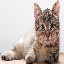

In [76]:
test_image

In [65]:
#image to array to get 3D array as our input layer
test_image=image.img_to_array(test_image)

In [66]:
test_image.shape

(64, 64, 3)

In [67]:
# prediction inputs take inputs in batches. 
#Thus there shoud be 04 dimensions to the input, including dimension to store batch information
#input expects this new dimension as the first index, axis=0
test_image=np.expand_dims(test_image,axis=0)

In [68]:
test_image.shape

(1, 64, 64, 3)

In [69]:
result=model.predict(test_image)

In [70]:
result

array([[ 1.]], dtype=float32)

In [71]:
# does 1 corresponds to cat or dog?
training_set.class_indices

NameError: name 'training_set' is not defined

In [84]:
if result[0][0]==1:
    print 'Dog'
else:
    print 'Cat'

Dog
